In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("malicious_phish.csv")

In [3]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [4]:
df.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


In [5]:
df = df.drop_duplicates(subset=["url"],keep='first')

<Axes: xlabel='type', ylabel='count'>

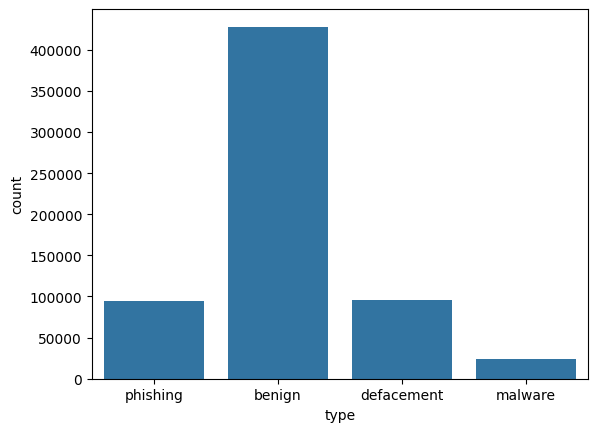

In [7]:
sns.countplot(x = 'type',data=df)

In [9]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.6 MB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 14.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 12.0 MB/s eta 0:00:0000:0100:01


In [10]:
benign = df[df["type"] == "benign"]
malicious = df[df["type"] != "benign"]

In [13]:
benign.shape, malicious.shape

((428080, 2), (213039, 2))

In [15]:
from sklearn.utils import resample
benign_downsampled = resample(benign,replace = False,n_samples = len(malicious))

In [20]:
augmented_df = pd.concat([benign_downsampled, malicious])
augmented_df = augmented_df.sample(frac=1).reset_index(drop=True)

In [22]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(augmented_df)

In [27]:
train_data.to_csv("train_data.csv")
test_data.to_csv("test_data.csv")